In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import datasets
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error

from sklearn.model_selection import train_test_split

In [39]:
# Simple Linearregression Model

class LinearRegression():
    """
    A simple linear regression model
    """
    
    def __init__(self, lr: float = 0.001, n_iters: int= 100000, tol: float = 1e-9):
        self.lr = lr
        self.n_iters = n_iters
        self.tol = tol
        self.weights = None
        self.bias = 0
        
    def fit(self, X: np.ndarray, y: np.ndarray):
        
        n_samples, n_features = X.shape
        self.weights = np.random.rand(n_features)
        
        for i in range(self.n_iters):
            # Calculating y_predictions and Errors
            # y^i = w.Xi + b
            # Not: self.weight is a scaler and X is an array
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y
            
            # Gradient Calculation
            # Computing the Gradient of the cost function (Important: here cost function is MSE) with respect to weight (w) and bias (b)
            # dw = 1/n. ∑ Xi. (y^i -yi)
            # db = 1/n. ∑ (y^i -yi)
            # Note: X is an array with shape (100, 1) and error is an array with shape (100,). Therefore we use
            # X.T (X transpose) to facilitate dot notation in form of (1, 100) . (100,)
            dw = (1/n_samples) * np.dot(X.T, (error))
            db = (1/n_samples) * np.sum(error)
            
            # Gradient Descent Update Rule
            # weights = weights − learning rate . dw
            # bias = bias - learning rate . db 
            self.weights -= self.lr * dw    # Update weights
            self.bias -= self.lr * db       # Update bias

            # Early stopping if gradient is very small
            # Read about the norm and calculating the norm of a vector or matrix
            if np.linalg.norm(dw) < self.tol:
                print(f"Converged after {i} iterations")
                break
            
    def predict(self, X: np.ndarray) -> np.ndarray: 
                
        return np.dot(X, self.weights) + self.bias
    

In [40]:
X, y = datasets.make_regression(n_samples= 100, n_features= 1, noise= 10, random_state= 42)

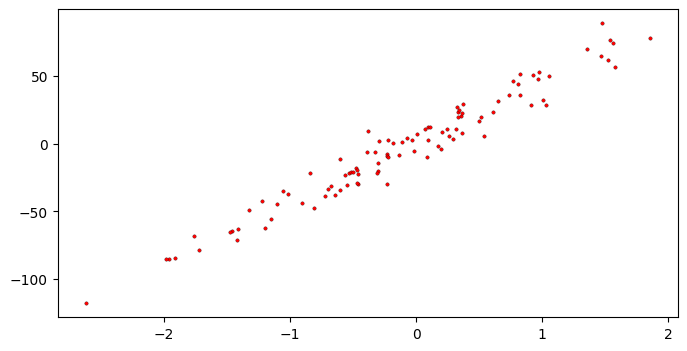

In [41]:
plt.figure(figsize=(8, 4))
plt.scatter(X, y, linewidths=0.2, marker='.', c='red', s=25, edgecolors='black' )
plt.show()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
reg = LinearRegression()

In [44]:
reg.fit(X_train, y_train)

Converged after 31370 iterations


In [45]:
y_pred = reg.predict(X_test)

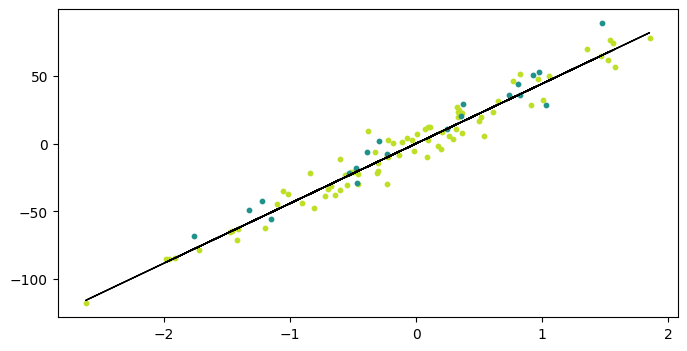

In [46]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,4))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=1, label='Prediction')
plt.show()

In [47]:
# Mean Squared Error
mse_value = np.mean((y_test - y_pred)**2)
print("MSE:", mse_value)

MSE: 104.20222653996571


In [48]:
# Mean Absolute Error
mae_value = np.mean(np.abs(y_test - y_pred))
print("MAE:", mae_value)

MAE: 8.416659922599873


In [50]:
# Root Mean Squared Error
rmse_value = np.sqrt(mse_value)
print("RMSE:", rmse_value)

RMSE: 10.20794918384519


In [51]:
# Mean Absolute Percentage Error
mape_value = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape_value)

MAPE: 70.39070816007822


In [ ]:
# R Squared
r_squared = 1 - (np.sum((y_test - predictions) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
print('R squared: ', r_squared)

R squared:  0.9374151607574672


In [52]:
# R Squared Adjusted
r_squared_adj = 1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - X.shape[1] - 1)
print('R squared adjusted: ', r_squared_adj)

R squared adjusted:  0.9339382252439932
